In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Load data from CSV file
data = pd.read_csv('../../../Dataset/ADBE_Stock.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,ADBE,264.010010,264.010010,266.239990,261.500000,265.750000,2594000
1,3/4/2019,ADBE,258.160004,258.160004,267.000000,254.080002,266.700012,2994900
2,3/5/2019,ADBE,257.380005,257.380005,259.869995,256.369995,259.000000,2101800
3,3/6/2019,ADBE,256.399994,256.399994,259.489990,253.839996,257.399994,1950500
4,3/7/2019,ADBE,255.460007,255.460007,257.489990,253.289993,255.770004,3185200
...,...,...,...,...,...,...,...,...
1319,5/28/2024,ADBE,478.429993,478.429993,478.670013,469.600006,473.010010,2575300
1320,5/29/2024,ADBE,477.600006,477.600006,482.790008,472.600006,472.779999,2214800
1321,5/30/2024,ADBE,445.869995,445.869995,466.820007,444.839996,464.899994,5606900
1322,5/31/2024,ADBE,444.760010,444.760010,448.230011,433.970001,447.720001,7487500


In [3]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6887.089, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6908.843, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6897.088, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6898.606, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6906.875, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6897.584, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6897.683, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6899.776, Time=0.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6900.112, Time=0.99 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6896.115, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6898.328, Time=0.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6898.655, Time=0.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6900.398, Time=1.56 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6885.124, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [6]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[318.4325048  318.82522423 318.21284054 318.89985742 318.28921639
 318.69897704 318.56345571 318.41462401 318.79683513 318.27831912
 318.81372281 318.376305   318.62949765 318.60176689 318.41349649
 318.76307122 318.33742712 318.74355129 318.4418818  318.58213173
 318.62210097 318.42267284 318.72834281 318.38859124 318.68793815
 318.4898284  318.5515139  318.63006644 318.43750934 318.69540824]


In [7]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[318.4325048  318.82522423 318.21284054 318.89985742 318.28921639
 318.69897704 318.56345571 318.41462401 318.79683513 318.27831912
 318.81372281 318.376305   318.62949765 318.60176689 318.41349649
 318.76307122 318.33742712 318.74355129 318.4418818  318.58213173
 318.62210097 318.42267284 318.72834281 318.38859124 318.68793815
 318.4898284  318.5515139  318.63006644 318.43750934 318.69540824
 318.4313961  318.6450271  318.52372377 318.53321998 318.62993538
 318.45478304 318.66582815 318.46616164 318.61281362 318.54671657
 318.52370391 318.62487104 318.47235937 318.64032508 318.49363471
 318.58934018 318.56147678 318.52019886 318.61714276 318.48891459
 318.61906036 318.51477149 318.57281224 318.57019901 318.52060352
 318.60831857 318.50371073 318.6018417  318.53059036 318.5616579 ]


In [8]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[318.4325048  318.82522423 318.21284054 318.89985742 318.28921639
 318.69897704 318.56345571 318.41462401 318.79683513 318.27831912
 318.81372281 318.376305   318.62949765 318.60176689 318.41349649
 318.76307122 318.33742712 318.74355129 318.4418818  318.58213173
 318.62210097 318.42267284 318.72834281 318.38859124 318.68793815
 318.4898284  318.5515139  318.63006644 318.43750934 318.69540824
 318.4313961  318.6450271  318.52372377 318.53321998 318.62993538
 318.45478304 318.66582815 318.46616164 318.61281362 318.54671657
 318.52370391 318.62487104 318.47235937 318.64032508 318.49363471
 318.58934018 318.56147678 318.52019886 318.61714276 318.48891459
 318.61906036 318.51477149 318.57281224 318.57019901 318.52060352
 318.60831857 318.50371073 318.6018417  318.53059036 318.5616579
 318.57463716 318.52336699 318.5994308  318.51641799 318.58827412
 318.54207782 318.55454895 318.57615572 318.52738073 318.59111397
 318.52697836 318.57786607 318

In [9]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 180.1002753679175


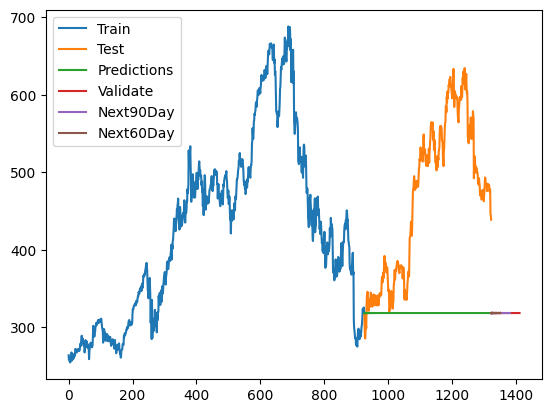

In [10]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_30,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

In [11]:
test_data.index

RangeIndex(start=926, stop=1324, step=1)

In [12]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#  Tính MAE
def calculate_mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 180.1002753679175
Testing MAPE: 29.00221266534314
Testing MAE: 151.30124296924245
